In [10]:
#essential libraries
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

#ML Algorithms
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.knn     import KNN
from pyod.models.lof     import LOF
from pyod.models.hbos    import HBOS
from pyod.models.iforest import IForest

## Loading the Data from other files

In [2]:
filename = 'df_processed_calocalTop2dRgr10'
infile = open(filename,'rb')
df = pickle.load(infile)
infile.close()

### Test the data is in the right format

In [3]:
df.head()

,eta,phi,Events
1,0.0,1.0,0.0
2,0.0,2.0,0.0
3,0.0,3.0,0.0
4,0.0,4.0,0.0
5,0.0,5.0,0.0


## Make preparations for all the ML algorithms to test

In [4]:
random_state = np.random.RandomState(42)
Z_eta, Z_phi = df[['eta','Events']], df[['phi','Events']]

outliers_fraction_eta_lof   = 0.054
outliers_fraction_phi_lof   = 0.008
outliers_fraction_eta_hbos  = 0.02
outliers_fraction_phi_hbos  = 0.008
outliers_fraction_eta_if    = 0.02
outliers_fraction_phi_if    = 0.004
outliers_fraction_eta_knn   = 0.01
outliers_fraction_phi_knn   = 0.005
outliers_fraction_eta_avknn = 0.005
outliers_fraction_phi_avknn = 0.0025

classifiers = {
        #'ABOD': ABOD(contamination=outliers_fraction),
        #'CBLOF':CBLOF(contamination=outliers_fraction,check_estimator=True, random_state=random_state),
        'LOF': LOF(n_neighbors=35, contamination=outliers_fraction_eta_lof),
        'FBag':FeatureBagging(LOF(n_neighbors=35),contamination=outliers_fraction_eta_lof,check_estimator=False,random_state=random_state),
        'HBOS': HBOS(contamination=outliers_fraction_eta_hbos),
        'IF': IForest(contamination=outliers_fraction_eta_if,random_state=random_state),
        'KNN': KNN(contamination=outliers_fraction_eta_knn),
        'AvgKNN': KNN(method='mean',contamination=outliers_fraction_eta_avknn)
}

classifiers2 = {
        #'ABOD': ABOD(contamination=outliers_fraction),
        #'CBLOF':CBLOF(contamination=outliers_fraction,check_estimator=True, random_state=random_state),
        'LOF': LOF(n_neighbors=35, contamination=outliers_fraction_phi_lof),
        'FBag':FeatureBagging(LOF(n_neighbors=35),contamination=outliers_fraction_phi_lof,check_estimator=False,random_state=random_state),
        'HBOS': HBOS(contamination=outliers_fraction_phi_hbos),
        'IF': IForest(contamination=outliers_fraction_phi_if,random_state=random_state),
        'KNN': KNN(contamination=outliers_fraction_phi_knn),
        'AvgKNN': KNN(method='mean',contamination=outliers_fraction_phi_avknn)
}


#make sure we only have the three columns in case we re run this
df = df[['eta','phi','Events']]
df

,eta,phi,Events
1,0.0,1.0,0.0
2,0.0,2.0,0.0
3,0.0,3.0,0.0
4,0.0,4.0,0.0
5,0.0,5.0,0.0
...,...,...,...
6430,98.0,60.0,0.0
6431,98.0,61.0,0.0
6432,98.0,62.0,0.0
6433,98.0,63.0,0.0


### Machine Learning Section, Eta then Phi

/home/c/.local/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


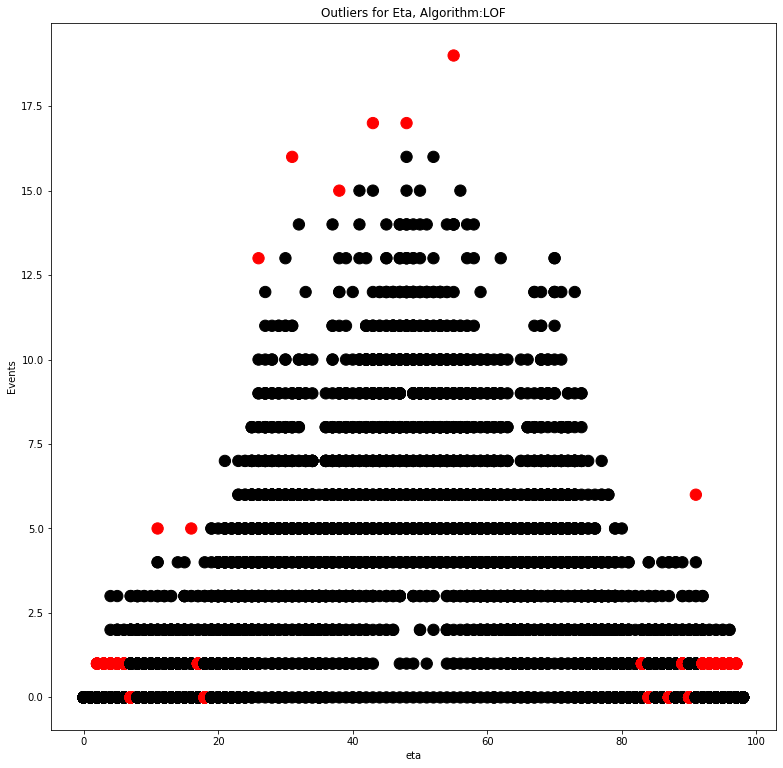

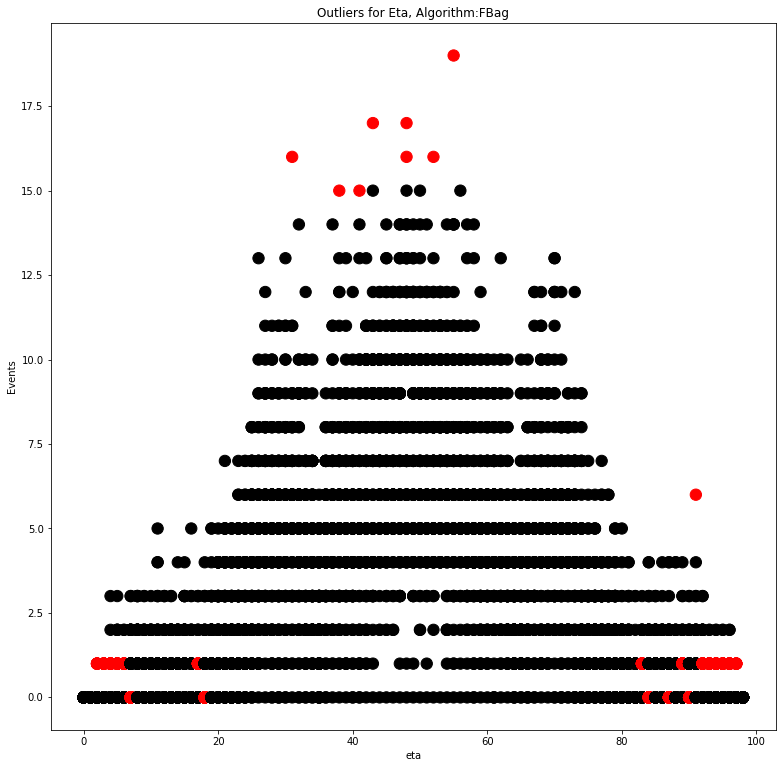

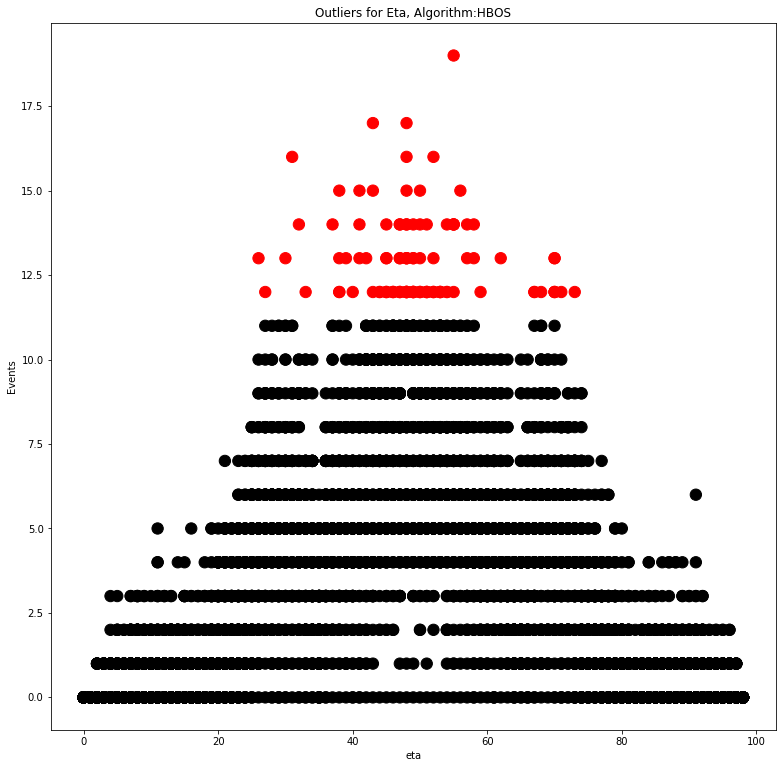

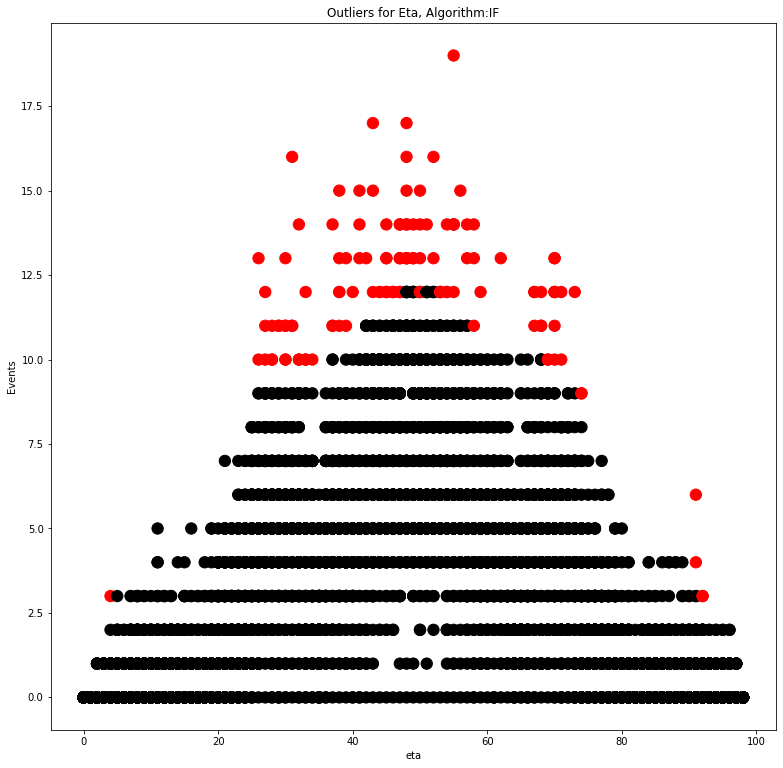

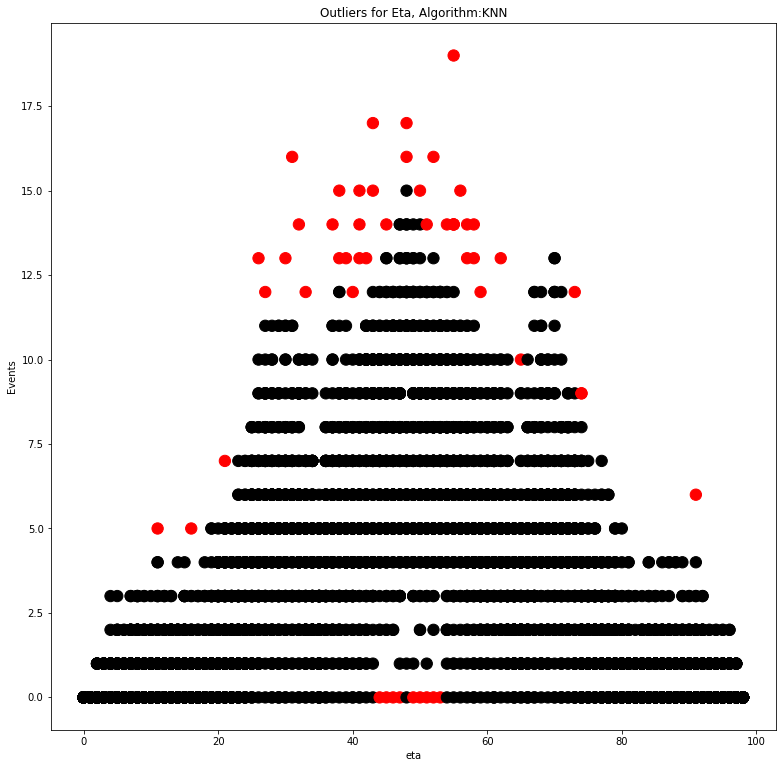

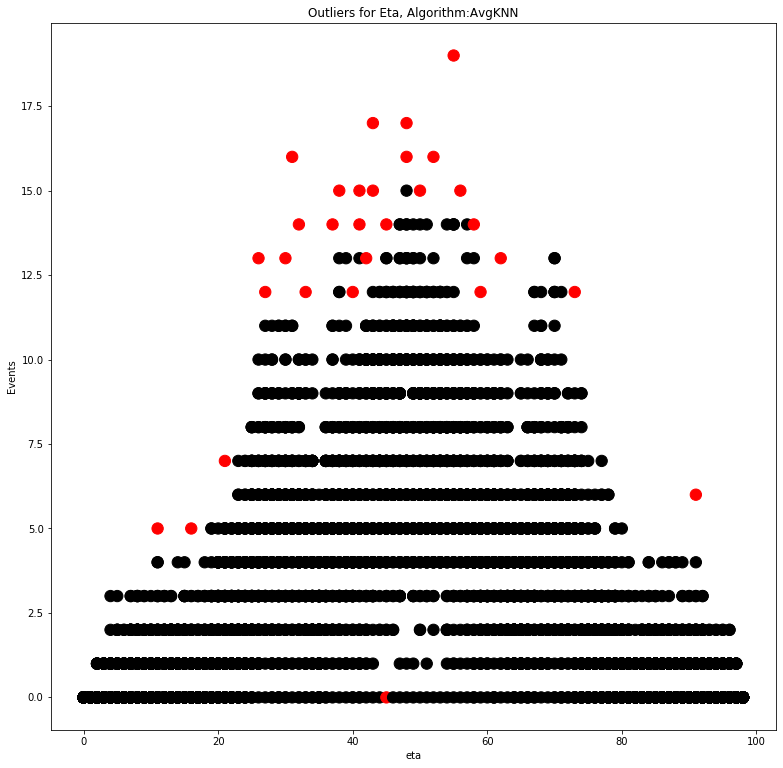

In [5]:
#make sure to reinitialize the BLOCK of CODE ABOVE before running this to clean dataframe

for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(Z_eta)
    tmp = "ol_eta_" + clf_name
    df[tmp]   = clf.labels_
    tmp2 = "sc_eta_" + clf_name
    df[tmp2] = clf.decision_scores_
    color = np.where(df[tmp] == 1, 'red', 'black')
    
    plt.figure(figsize=(13,13))
    plt.xlabel('eta')
    plt.ylabel('Events')
    plt.title('Outliers for Eta, Algorithm:'+clf_name)
    plt.scatter(df['eta'],df['Events'], s=128, color=color)

/home/c/.local/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


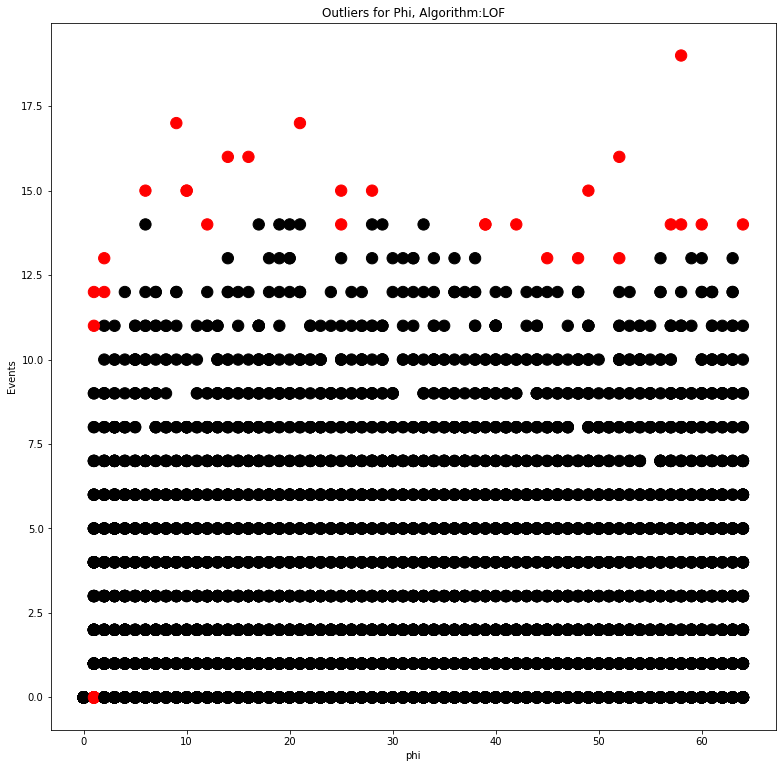

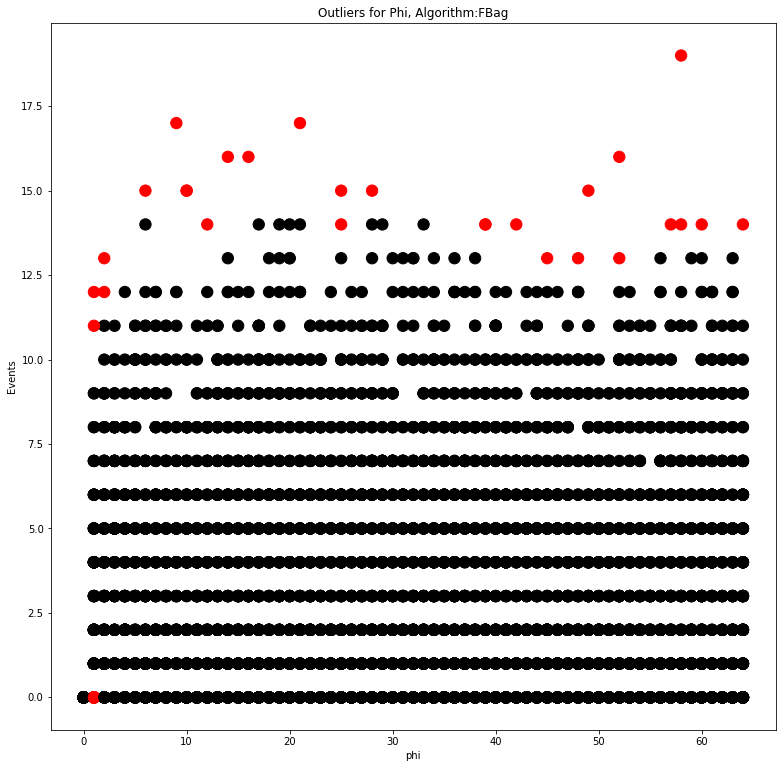

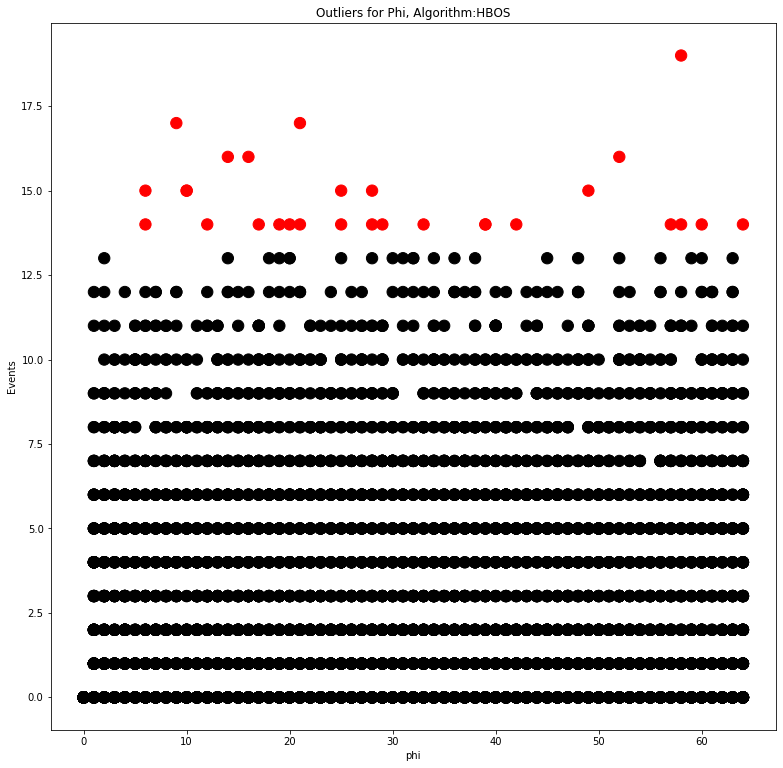

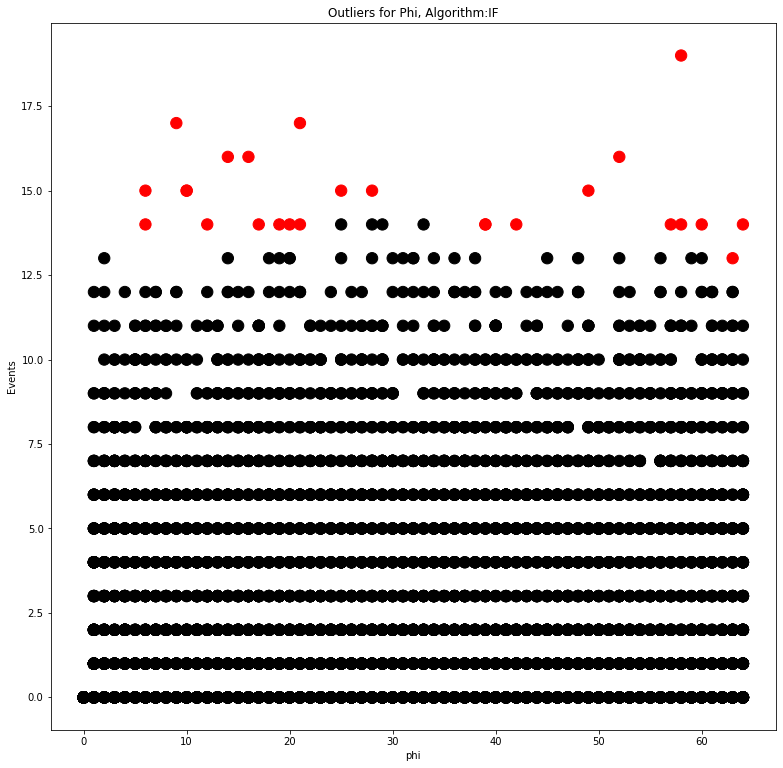

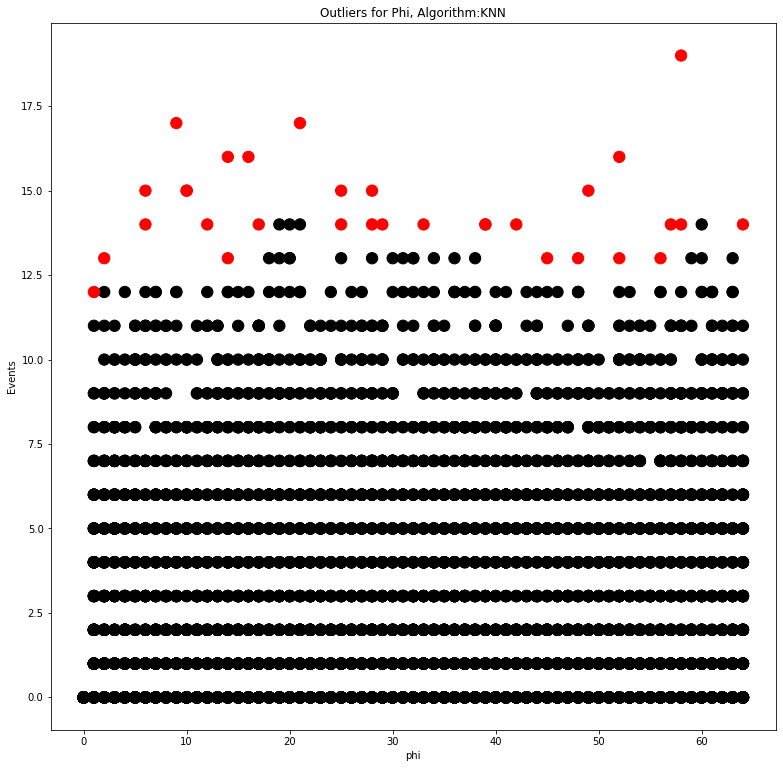

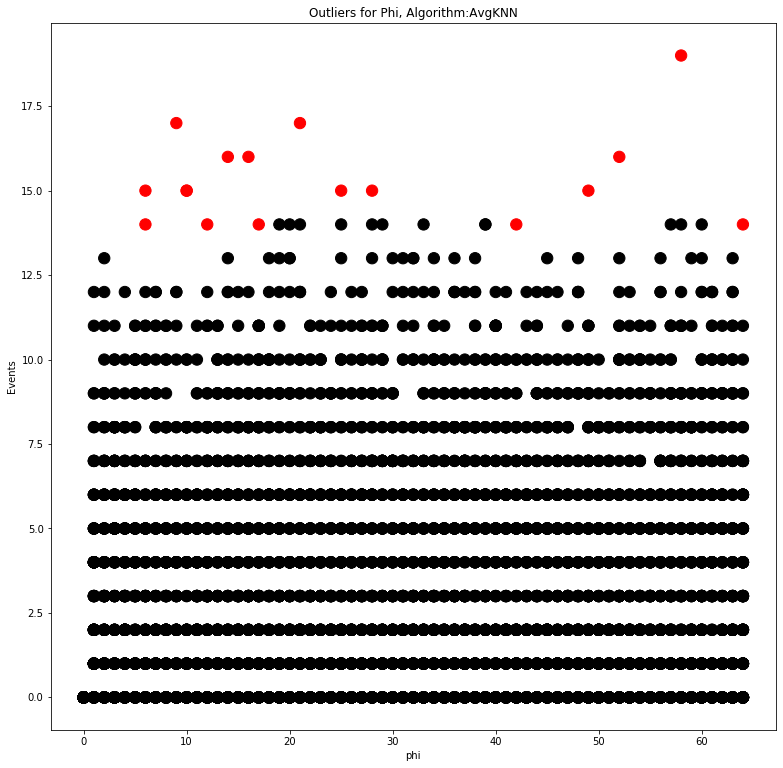

In [6]:
#make sure to reinitialize the BLOCK of CODE 2 BLOCKS ABOVE before running this to clean dataframe

for i, (clf_name, clf) in enumerate(classifiers2.items()):
    clf.fit(Z_phi)
    tmp3 = "ol_phi_" + clf_name
    df[tmp3]   = clf.labels_
    tmp4 = "sc_phi_" + clf_name
    df[tmp4] = clf.decision_scores_    
    color2 = np.where(df[tmp3] == 1, 'red', 'black')
    
    plt.figure(figsize=(13,13))
    plt.xlabel('phi')
    plt.ylabel('Events')
    plt.title('Outliers for Phi, Algorithm:'+clf_name)
    plt.scatter(df['phi'],df['Events'], s=128, color=color2)

## 3d interactive plot to view the outliers the LOF algorithm identifies

In [7]:
Z = df[['phi','eta','Events']]

#set parameters
outliers_fraction = 0.003

#train the ML algorithm
clf = LOF(contamination=outliers_fraction)
clf.fit(Z)
predictions = clf.labels_  # binary labels (0: inliers, 1: outliers)
scores = clf.decision_scores_  # raw outlier scores
#########################
try:
    df = df.drop('outlier',1)
except:
    print("")
#########################
df['outlier'] = predictions
#########################
color = np.where(df['outlier'] == 1, 'red', 'black')
#########################

### NOTE: Rerun the imports if the below plot does not have interactivity, then run it again

<IPython.core.display.Javascript object>


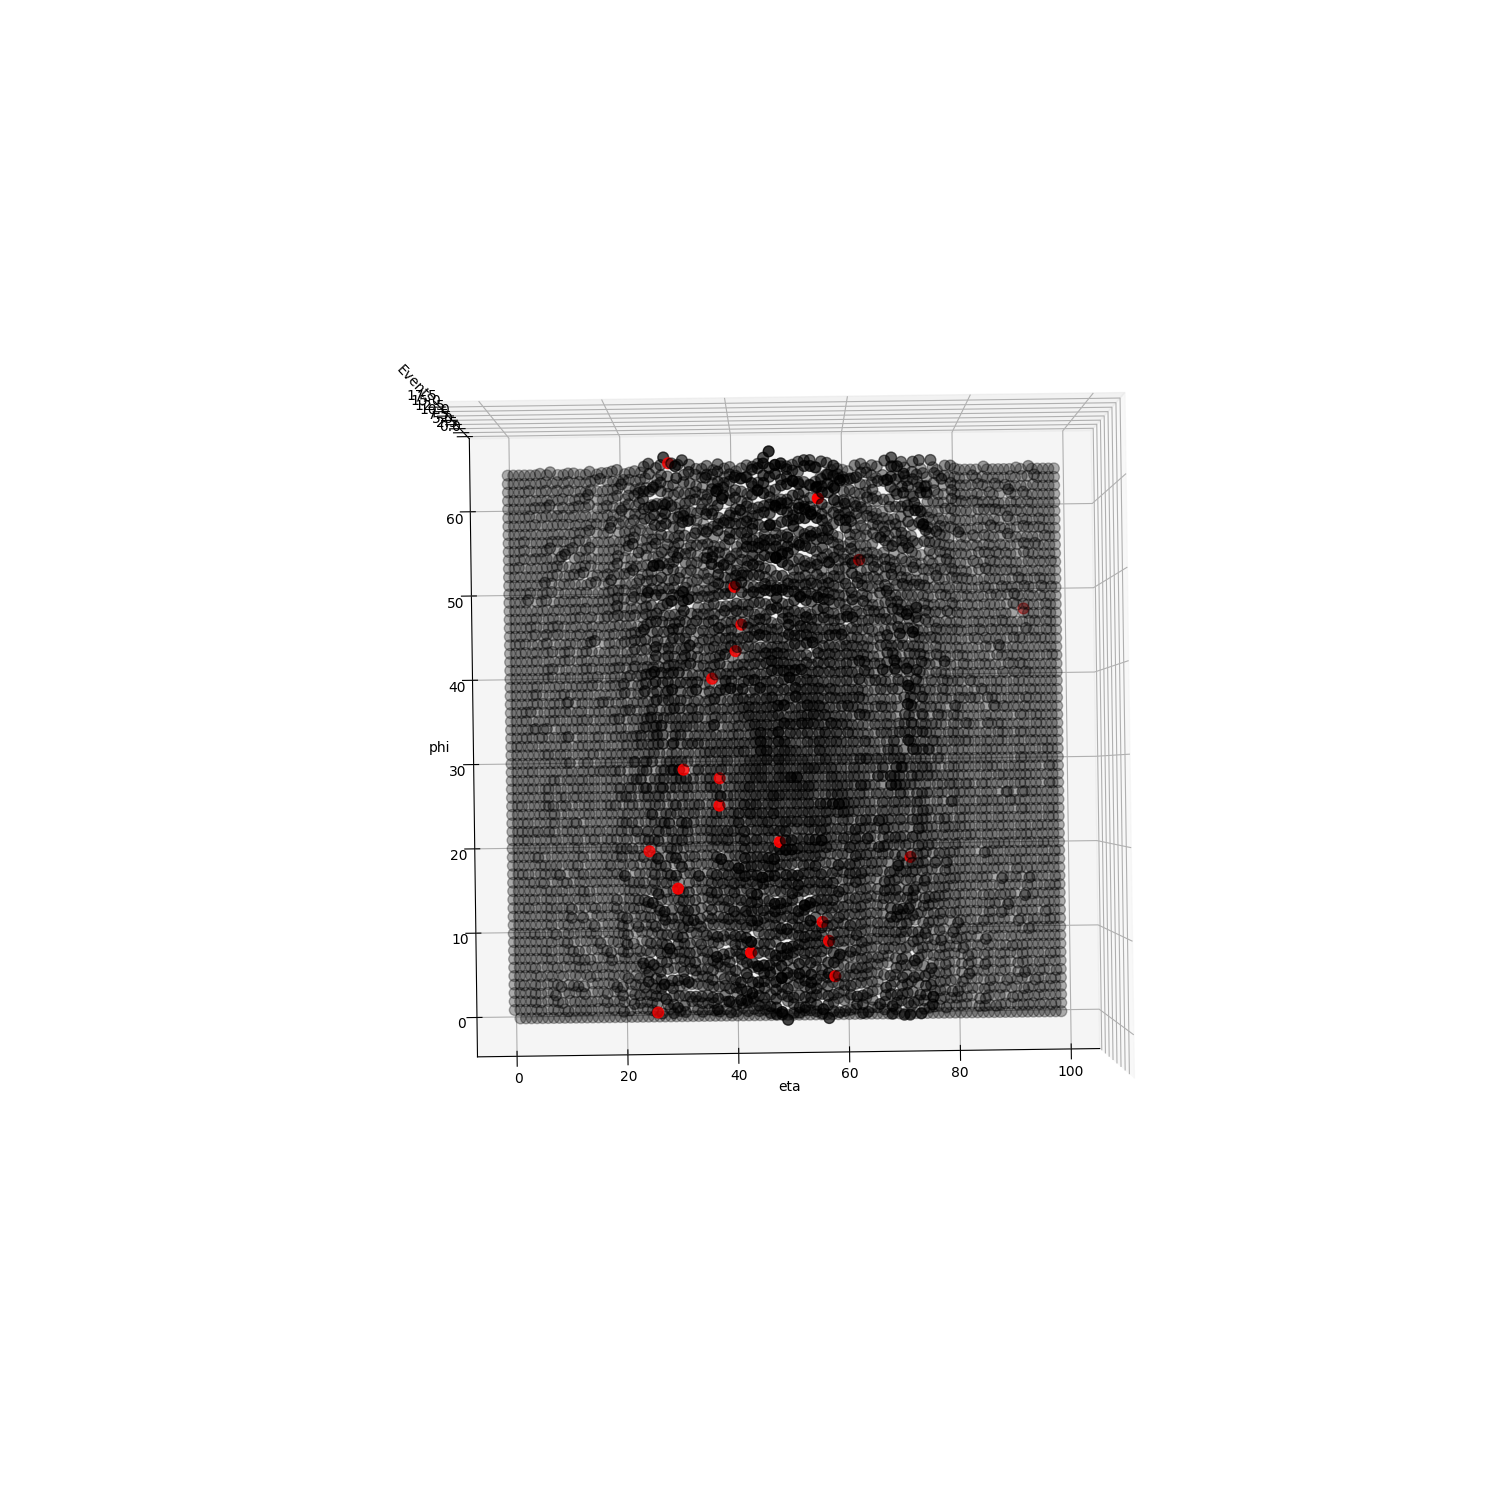

In [25]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['eta'], df['phi'], df['Events'], c=color, s=60)
ax.view_init(30, 185)
ax.set_xlabel('eta')
ax.set_ylabel('phi')
ax.set_zlabel('Events')
plt.show()

### NOTE FOR ABOVE:
- In the event that you get an error "Too many Files open", you will need to close this file, the project folder file, and the server running the notebook and restart that server and these files...rerun the calculations, THEN run the initializations a second time after trying to plot the above 3d scatter plot. When running it after initializing the first block the second time, then the plot should work with %matplotlib notebook as an interactive 3d scatter plot
- I read that setting !ulimit -n <number>  where number = 4096 or something can be useful. Alternately run !ulimit -n to see what the number of upper limit files you can have open is. I will likely have to increase this to add more files to this

### Our next task will be to optimally tune the hyperparameters for each machine learning algorithms which include...
- outlier_fraction
- random_state
- ?

With this information, we will move on to the next application...

# With the Outliers and Scores in hand, we now move on to the next Application - Constructing a 3d histogram plot in x=Eta,y=phi,z=outlier(T/F)
We do this because we are going to pull in data from other histogram plots, do the same process for each of these plots, being careful to release the memory allocated as we compile our ultimate dataframe, and upon pulling in 2, 3 then eventually all the files, we will plot this 3d histogram in eta,phi,outliers and look for clusters at particular locations in eta/phi using a supervised machine learning algorithm using the fact that we know the ground_truth if an outlier is true or false here...or we just feed it multiple features and try to get a cluster out of it  Z = df['eta','phi'] ...that sort of thing, look into my notes on this

On the other hand, just create a dataframe of outliers dfoutliers = df[df['outliers']>0] , then run a clustering algorithm over eta vs phi. Z = dfoutliers[['eta','phi']] ...consider organizing the data from each plot in a feature called 'plot_id', so plot_id=1,2,3,...etc ; and plot the points as different colors to identify which plots are common to the outlier cluster ...or for that matter you can just call the dataframe where for a given eta/phi location, the outlier = 1 over all plots...if those conditions are met then the outlier exists for those plots at that location of eta/phi

In [13]:
df['scores'] = scores

In [16]:
df

,eta,phi,Events,ol_eta_LOF,sc_eta_LOF,ol_eta_FBag,sc_eta_FBag,ol_eta_HBOS,sc_eta_HBOS,ol_eta_IF,...,ol_phi_HBOS,sc_phi_HBOS,ol_phi_IF,sc_phi_IF,ol_phi_KNN,sc_phi_KNN,ol_phi_AvgKNN,sc_phi_AvgKNN,outlier,scores
1,0.0,1.0,0.0,0,1.0,0,1.0,0,4.811379,0,...,0,4.728614,0,0.042179,0,0.0,0,0.0,0,1.132314
2,0.0,2.0,0.0,0,1.0,0,1.0,0,4.811379,0,...,0,4.728614,0,0.042073,0,0.0,0,0.0,0,1.082616
3,0.0,3.0,0.0,0,1.0,0,1.0,0,4.811379,0,...,0,4.728614,0,0.044892,0,0.0,0,0.0,0,1.068452
4,0.0,4.0,0.0,0,1.0,0,1.0,0,4.811379,0,...,0,4.728614,0,0.042140,0,0.0,0,0.0,0,1.063907
5,0.0,5.0,0.0,0,1.0,0,1.0,0,4.811379,0,...,0,4.728614,0,0.026323,0,0.0,0,0.0,0,1.059992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,98.0,60.0,0.0,0,1.0,0,1.0,0,4.811172,0,...,0,4.728314,0,0.030784,0,0.0,0,0.0,0,1.042174
6431,98.0,61.0,0.0,0,1.0,0,1.0,0,4.811172,0,...,0,4.728314,0,0.026270,0,0.0,0,0.0,0,1.054926
6432,98.0,62.0,0.0,0,1.0,0,1.0,0,4.811172,0,...,0,4.728314,0,0.035321,0,0.0,0,0.0,0,1.070161
6433,98.0,63.0,0.0,0,1.0,0,1.0,0,4.811172,0,...,0,4.728314,0,0.051112,0,0.0,0,0.0,0,1.104910


<IPython.core.display.Javascript object>


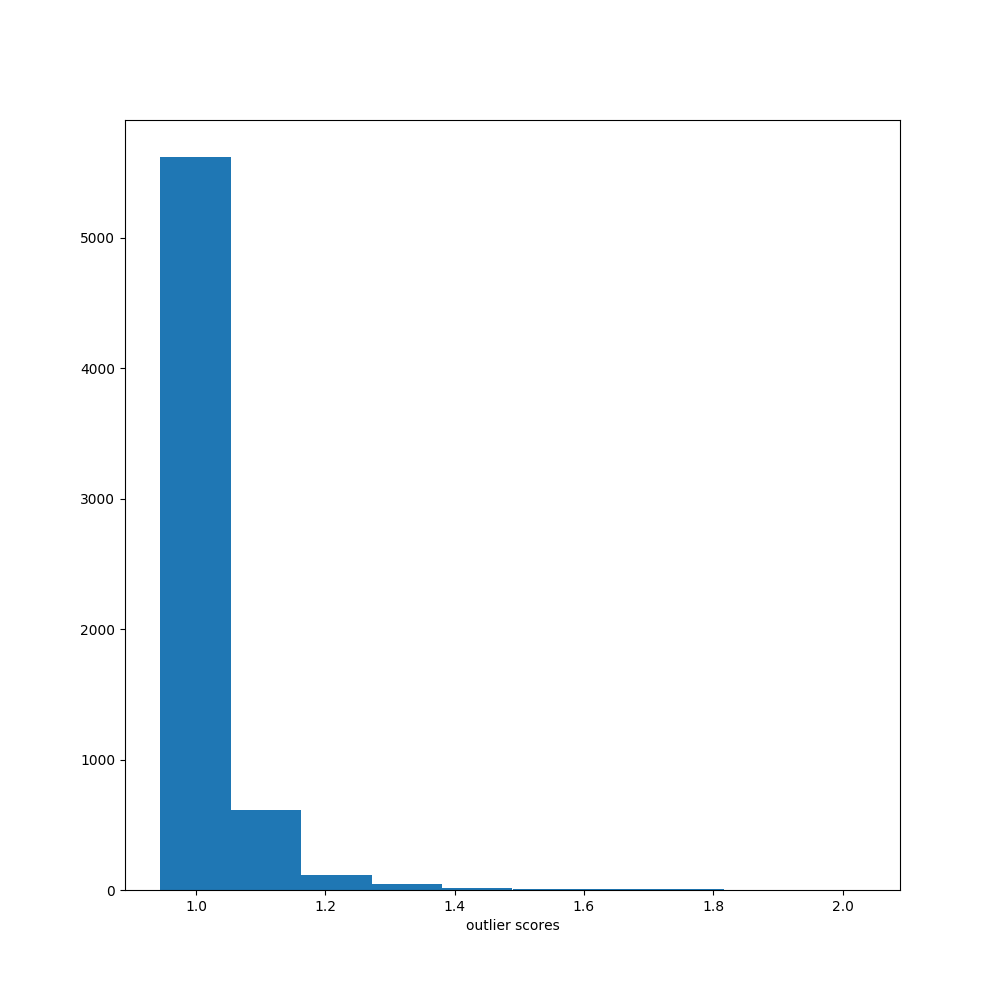

In [34]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_xlabel('outlier scores')
ax.hist(df['scores'])
plt.show()

#### The decision of how high a "score" is an outlier lies in the outlier_fraction hyperparameter. Higher outlier_fraction = more outliers = lower score required to be classified as outlier
- Question: For this application, how high of a score should be used as a threshold to identify an entry as an outlier? To get the outlier fraction based on score threshold -> <code>outlier_fraction = df[df['scores']>threshold].size / df['scores'].size</code>

In [35]:
dftest = df[df['outlier']>0]

In [36]:
dftest['scores'].min()

1.4908678522308192

In [37]:
dftest['scores'].size

20

In [38]:
df['scores'].size

6434

In [39]:
df[df['scores']>1.3].size

2088

## With scores in hand, we now will Aggregate using built in PyOD metrics
- see toolbox and discussion about aggregating scores